# Miscellaneous Stock Myths
## Looking at the myth of the [best days/months to buy stock](https://www.thebalance.com/best-time-s-of-day-to-day-trade-the-stock-market-1031361#:~:text=Best%20Days%20and%20Months%20to%20Trade%20the%20Stock%20Market&text=Many%20experts%20recommend%20selling%20on,precedes%20a%20three%2Dday%20weekend.)
1.[Friday Close vs Monday Open](#Friday-Close-vs-Monday-Open)
#### [Dataset](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs) provided by Boris Marjanovic 


In [64]:
import pandas as pd
import datetime as dt
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [65]:
df=pd.read_csv("spy.us.txt")

In [66]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(df['Date'])
df['DayOfWeek']=df['Date'].dt.dayofweek
mf_df=pd.DataFrame()

### Friday Close vs Monday Open

In [67]:
for i in range(len(df)-5):
    row=df.iloc[i]
    if row['DayOfWeek']==0:
        for j in range(i,i+5): #starting with tues check next 4 tradings days for a friday
            frow=df.iloc[j] #friday row
            if frow['DayOfWeek']==4:
                diff=frow['Close']-row['Open']
                start=row['Date']
                mf_df=mf_df.append(pd.DataFrame([diff],[start]))
                #print(type(pd.DataFrame([start,diff])))

In [68]:
mf_df['Date']=mf_df.index
mf_df.columns=["Difference","Date"]
x=mf_df.index.values
y=mf_df.values
mf_df
#x[1].dt.year

,Difference,Date
2005-02-28,1.38,2005-02-28
2005-03-07,-1.98,2005-03-07
2005-03-14,-1.63,2005-03-14
2005-03-28,0.01,2005-03-28
2005-04-04,0.56,2005-04-04
...,...,...
2017-10-02,2.88,2017-10-02
2017-10-09,0.75,2017-10-09
2017-10-16,1.90,2017-10-16
2017-10-23,0.23,2017-10-23


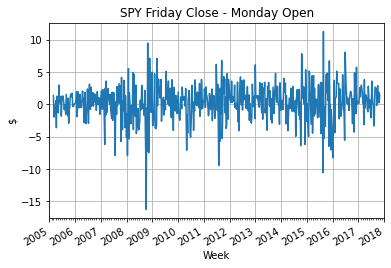

In [69]:

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
data=mf_df
#slope, intercept, r_value, p_value, std_err = linregress(x, y) 


fig, ax = plt.subplots()
ax.plot('Date', 'Difference', data=data)

plt.title("SPY Friday Close - Monday Open")
plt.xlabel("Week")
plt.ylabel("$")
#plt.plot(pred_x, intercept + slope*pred_x, 'r', label='fitted line 1880 to 2015')


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime64(data['Date'][0], 'Y')
datemax = np.datetime64(data['Date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

In [70]:
mf_df['Difference'].describe()

count    577.000000
mean       0.196619
std        2.788956
min      -16.246000
25%       -1.175000
50%        0.340000
75%        1.760000
max       11.250000
Name: Difference, dtype: float64

In [71]:
dec_df=pd.DataFrame()
for i in range(2005,2017):
    curr = df.loc[(df['Date'].dt.month == 12) & (df['Date'].dt.year == i)]
    diff=curr.tail(1)['Close'].item()-curr.head(1)['Open'].item()
    start=i
    dec_df=dec_df.append(pd.DataFrame([diff],[start]))

In [72]:
dec_df.head()

,0
2005,-1.310
2006,0.940
2007,-1.710
2008,2.380
2009,0.427
